## HW Week 12 (#10) - Data fitting with various functions - Due Friday Nov 11, 2022

You will be using the same data "miniDR17.fits" from the TCU Online Week 11:<br>

Remember you need to remove Identified bad data, 
however data that are just bad in one quantity may remain
Use masking to remove any remaining bad values (typically 9999 or -9999 in this file, <b>but remember to remove Outlier!!!!  If you are not sure, ask!!!</b>). 

In [4]:
from matplotlib import pyplot as plt
import numpy as np
from astropy.io import fits 
import scipy.optimize as opt

# POTENTIAL FITTING FUNCTIONS
def linear(x,m,b):
    return m*x+b

def poly2(x,a,b,c):
    return a*(x**2)+(b*x)+c

def poly3(x,a,b,c,d):
    return (a*(x**3))+(b*(x**2))+(c*x)+d

def cosfit (x,a,b,c,d):
    return a*np.cos(b*x + c) + d

def exponential(x,a,b,c,d):
    return a*np.exp(b*x + c) + d

def logfit(x,a,b,c,d):
    return a*np.log(b*x + c) + d

def sigmoid(x,a,b,c,d):
    return (c/(1 + np.exp(-b*(x-a))) + d)


# Monte Carlo-version of 2 parameter Curve Fit that can use BOTH x and Y errors
def mcFit2(func, x, y, x_err=0.1, y_err=0.1, p0=[1,1]):
    slope = list()
    y_ints = list()
    iters = 500 
    for i in range(iters):
        # remember random normal distribution (Gaussian)
        weightsx = np.random.randn(len(y))
        weightsy = np.random.randn(len(y))
        y_adj = y + y_err*weightsy
        x_adj = x + x_err*weightsx 
        popt, pcov = opt.curve_fit(func, x_adj, y_adj, p0=p0)
        slope.append(popt[0])
        y_ints.append(popt[1])
    return (np.median(slope),np.median(y_ints))


# Monte Carlo-version of 3 parameter Curve Fit that can use BOTH x and Y errors
def mcFit3(func, x, y, x_err=0.1, y_err=0.1,p0=[1,1,1]):
    paramA = list()
    paramB = list()
    paramC = list()
    iters = 500 
    for i in range(iters):
        # remember random normal distribution (Gaussian)
        weightsx = np.random.randn(len(y))
        weightsy = np.random.randn(len(y))
        y_adj = y + y_err*weightsy
        x_adj = x + x_err*weightsx 
        popt, pcov = opt.curve_fit(func, x_adj, y_adj, p0=p0)
        paramA.append(popt[0])
        paramB.append(popt[1])
        paramC.append(popt[2])
    return (np.median(paramA),np.median(paramB),np.median(paramC))

# Monte Carlo-version of 4 parameter Curve Fit that can use BOTH x and Y errors
def mcFit4(func, x, y, x_err=0.1, y_err=0.1, p0=[1,1,1,1]):
    paramA = list()
    paramB = list()
    paramC = list()
    paramD = list()
    iters = 500 
    for i in range(iters):
        # remember random normal distribution (Gaussian)
        weightsx = np.random.randn(len(y))
        weightsy = np.random.randn(len(y))
        y_adj = y + y_err*weightsy
        x_adj = x + x_err*weightsx 
        popt, pcov = opt.curve_fit(func, x_adj, y_adj, p0=p0)
        paramA.append(popt[0])
        paramB.append(popt[1])
        paramC.append(popt[2])
        paramD.append(popt[3])
    return (np.median(paramA),np.median(paramB),np.median(paramC),np.median(paramD))


In [5]:
# READ IN FITS FILES
star_hdus = fits.open('miniDR17.fits')
star = star_hdus[1].data
print(star_hdus[1].columns)
star_hdus.close()

ColDefs(
    name = 'APOGEE_ID'; format = '30A'
    name = 'RA'; format = 'D'
    name = 'DEC'; format = 'D'
    name = 'GLON'; format = 'D'
    name = 'GLAT'; format = 'D'
    name = 'TEFF'; format = 'E'
    name = 'TEFF_ERR'; format = 'E'
    name = 'LOGG'; format = 'E'
    name = 'LOGG_ERR'; format = 'E'
    name = 'J'; format = 'E'
    name = 'J_ERR'; format = 'E'
    name = 'K'; format = 'E'
    name = 'K_ERR'; format = 'E'
    name = 'SNR'; format = 'E'
    name = 'VHELIO_AVG'; format = 'E'
    name = 'VERR'; format = 'E'
    name = 'FE_H'; format = 'E'
    name = 'FE_H_ERR'; format = 'E'
    name = 'O_FE'; format = 'E'
    name = 'O_FE_ERR'; format = 'E'
    name = 'NI_FE'; format = 'E'
    name = 'NI_FE_ERR'; format = 'E'
    name = 'NVISTIS'; format = 'J'
    name = 'VSCATTER'; format = 'E'
    name = 'ASPCAPFLAG'; format = 'K'
    name = 'STARFLAG'; format = 'K'
    name = 'EXTRATARG'; format = 'J'
    name = 'GAIA_PARALLAX'; format = 'E'
    name = 'GAIA_PARALLAX_ERROR'; for

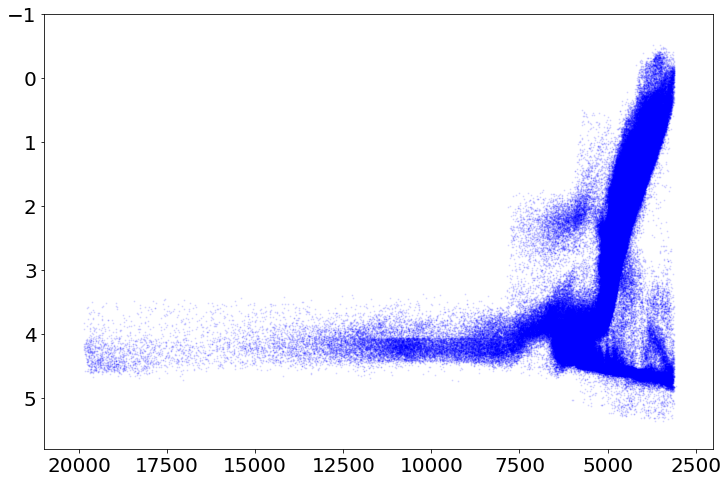

In [6]:
# TWO BITWISE FLAGS FOR BAD DATA - THESE REMOVE IDENTIFIED BAD DATA            
badbits = 2**23        # aspcapstar flag - Chemistry
suspectbits = 2**16    # star flag - Stellar parameters

# Make a Boolena Mask to remove bad data
gd = (np.bitwise_and(star['aspcapflag'], badbits) == 0) &\
     (np.bitwise_and(star['starflag'], suspectbits) == 0)
good = np.where(gd)[0]


# PLOT TO VERIFY FITS FILE READ IN & BAD MASK DATA
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111)
ax.scatter((star['TEFF'][good]),star['LOGG'][good],s=1,c='b',alpha=0.1)

ax.xaxis.set_tick_params(labelsize=20)
ax.yaxis.set_tick_params(labelsize=20)
ax.set_xlim(21000,2000)
ax.set_ylim(5.8,-1)

plt.show()

## DATA FIT 3

Fit a linear, polynomial (poly3), and a sigmoid functions and to the following selections of the data:<br>
3. Select stars only with with $GLAT > 60$ <br>
   __Fit Fe\_H,  (Fe\_H\_ERR)  vs.  NI\_FE (NI\_FE\_ERR)__<br>

For this fit of the above selection:

1. What are the best-fit values of the parameters? 
2. Which fucntion fits the data best?
3. Is there a second population? (Can you fit outliers with a reasonable linear trend)

LINEAR: 0.028, 0.018
POLY3: -0.035, -0.072, 0.009, 0.021


/Users/sheridyncampos/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


SIGMOID: 13.000, 4.000, 0.500, 0.011


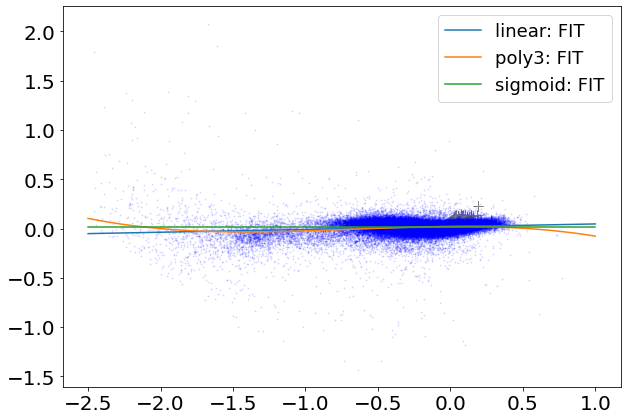

In [11]:
badbits = 2**23        # aspcapstar flag - Chemistry
suspectbits = 2**16    # star flag - Stellar parameters

star = star[~np.isnan(star['FE_H'])]
star = star[~np.isnan(star['NI_FE'])]
star = star[~np.isnan(star['FE_H_ERR'])]
star = star[~np.isnan(star['NI_FE_ERR'])]
# Make a Boolena Mask to remove bad data - AND ANY OTHER NEEDE CUTS (e.g., −2 < GLAT < 2 )
ct1 = (np.bitwise_and(star['aspcapflag'], badbits) == 0) &\
     (np.bitwise_and(star['starflag'], suspectbits) == 0) &\
     (star['GLAT'] > 60) 

cut1 = np.where(ct1)[0]


## LINEAR FIT (2 parameter)
slope, intercept = mcFit2(linear, star['Fe_H'][cut1], star['NI_FE'][cut1], p0=[0,0])

print(f'LINEAR: {slope:.3f}, {intercept:.3f}')

## POLY3 FIT (4 parameter)
PolyA, PolyB, PolyC, PolyD = mcFit4(poly3, star['Fe_H'][cut1], star['NI_FE'][cut1],p0=[0,0,0,0])

print(f'POLY3: {PolyA:.3f}, {PolyB:.3f}, {PolyC:.3f}, {PolyD:.3f}')

## Sigmoid (4 parameter)
sigA, sigB, sigC, sigD = mcFit4(sigmoid, star['Fe_H'][cut1], star['NI_FE'][cut1],p0=[13,4,.5,.5])

print(f'SIGMOID: {sigA:.3f}, {sigB:.3f}, {sigC:.3f}, {sigD:.3f}')


# PLOT TO VERIFY FITS FILE READ IN & BAD MASK DATA
fig1 = plt.figure(figsize=(10,7))
ax1 = fig1.add_subplot(111)
ax1.xaxis.set_tick_params(labelsize=20)
ax1.yaxis.set_tick_params(labelsize=20)

# PLOT DATA AND ERROR BARS
ax1.scatter(star['Fe_H'][cut1],star['NI_FE'][cut1],s=1,c='b',alpha=0.1)
ax1.errorbar((star['FE_H_ERR'][cut1]),star['NI_FE_ERR'][cut1], xerr=(star['FE_H_ERR'][cut1]/1000),
             yerr=(star['NI_FE_ERR'][cut1]/1000), ecolor='grey',fmt='none', capsize=5, zorder=0)


# PLOT DATA FITS FROM ABOVE
x_plot = np.linspace(-2.5,1,1000) # X-PLOTING FOR FITS
#linear fit
ax1.plot(x_plot,linear(x_plot, slope, intercept), label='linear: FIT')
#poly3 fit
ax1.plot(x_plot,poly3(x_plot, PolyA, PolyB, PolyC, PolyD ), label='poly3: FIT')
#sigmoid
ax1.plot(x_plot,sigmoid(x_plot, sigA, sigB, sigC, sigD), label='sigmoid: FIT')

plt.legend(loc='best', fontsize=18)
plt.show()

## DATA FIT 4

Fit  a linear, a logfit, and a polynomial (poly2) functions and to the following selections of the data:<br>
4. Select stars only with with $GLAT < -10$  <br>
   __Fit TEFF,  (TEFF\_ERR)   vs.  (star['J'] - star['K']) with error of (np.sqrt(star['J\_ERR']\*\*2 + star['K\_ERR']\*\*2))__<br>
<br>
For this fit of the above selection:

1. What are the best-fit values of the parameters? 
2. Which fucntion fits the data best?
3. Is there a second population? (Can you fit outliers with a reasonable linear trend)

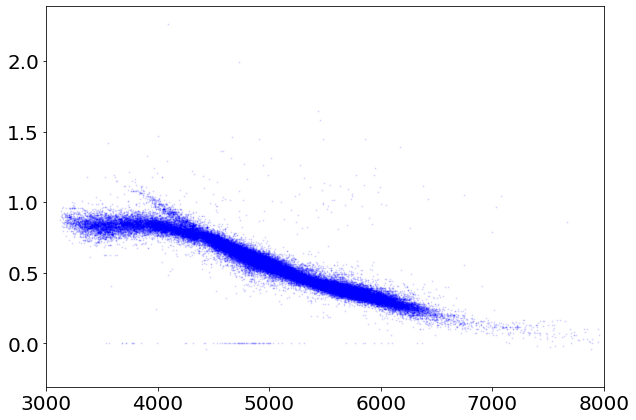

In [58]:
star_hdus = fits.open('miniDR17.fits')
starfit4 = star_hdus[1].data
star_hdus.close()

badbits = 2**23        #aspcapstar flag - Chemistry
suspectbits = 2**16    #star flag - Stellar parameters

starfit4 = starfit4[~np.isnan(starfit4['TEFF'])]
starfit4 = starfit4[~np.isnan(starfit4['J'])]
starfit4 = starfit4[~np.isnan(starfit4['K'])]
# Make a Boolena Mask to remove bad data - AND ANY OTHER NEEDE CUTS (e.g., −2 < GLAT < 2 )
ct1 = (np.bitwise_and(starfit4['aspcapflag'], badbits) == 0) &\
     (np.bitwise_and(starfit4['starflag'], suspectbits) == 0) &\
     (starfit4['GLAT'] > 60) 

cut1 = np.where(ct1)[0]
Substar = starfit4['J']-starfit4['K']

fig1 = plt.figure(figsize=(10,7))
ax1 = fig1.add_subplot(111)
ax1.xaxis.set_tick_params(labelsize=20)
ax1.yaxis.set_tick_params(labelsize=20)
ax1.scatter(starfit4['TEFF'][cut1],Substar[cut1],s=1,c='b',alpha=0.1)
plt.xlim([3000,8000])
plt.show()

In [61]:
## LINEAR FIT (2 parameter)
slope, intercept = mcFit2(linear, starfit4['TEFF'][cut1], Substar[cut1], p0=[0,1])

print(f'LINEAR: {slope:.3f}, {intercept:.3f}')

## Log FIT (4 parameter)
LogA, LogB, LogC, LogD = mcFit4(logfit, starfit4['TEFF'][cut1], Substar[cut1],p0=[-10,15,20,-8])

print(f'POLY3: {LogA:.3f}, {LogB:.3f}, {LogC:.3f}, {LogD:.3f}')

## POLY2 FIT (3 parameter)
polyA, polyB, polyC,  = mcFit3(poly2, starfit4['TEFF'][cut1], Substar[cut1],p0=[600,1,1])

print(f'POLY2: {polyA:.3f}, {polyB:.3f}, {polyC:.3f}')


LINEAR: -0.000, 1.611


/var/folders/bk/mr7vzgq96tnflth2lc57l8h40000gn/T/ipykernel_68294/3932149318.py:23: RuntimeWarning: invalid value encountered in log
  return a*np.log(b*x + c) + d


POLY3: -1.220, 13.249, 6340.978, 14.222
POLY2: 0.000, -0.000, 2.174


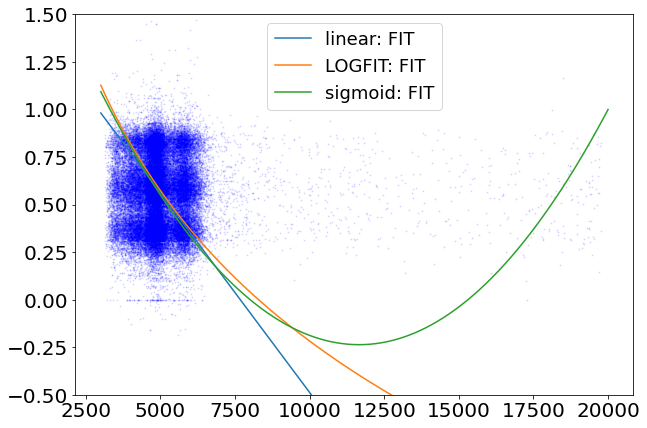

In [69]:
# PLOT TO VERIFY FITS FILE READ IN & BAD MASK DATA
fig1 = plt.figure(figsize=(10,7))
ax1 = fig1.add_subplot(111)
ax1.xaxis.set_tick_params(labelsize=20)
ax1.yaxis.set_tick_params(labelsize=20)

# PLOT DATA AND ERROR BARS
ax1.scatter(star['TEFF'][cut1],Substar[cut1],s=1,c='b',alpha=0.1)


# PLOT DATA FITS FROM ABOVE
x_plot = np.linspace(3000,20000,1000) # X-PLOTING FOR FITS
#linear fit
ax1.plot(x_plot,linear(x_plot, slope, intercept), label='linear: FIT')
#log fit
ax1.plot(x_plot,logfit(x_plot, LogA, LogB, LogC, LogD ), label='LOGFIT: FIT')
#poly3
ax1.plot(x_plot,poly2(x_plot, polyA, polyB, polyC), label='sigmoid: FIT')

plt.legend(loc='best', fontsize=18)
plt.ylim([-.5,1.5])
plt.show()
#the line that fits best is the sigmoid
#the sec0nd population could be the stuff away from the big glob of points 

## DATA FIT 5

Fit  a linear, a polynomial (poly3), and a cosfit functions and to the following selections of the data:<br>
5. Select stars only with with $-10< GLAT < 10$<br>
   __Fit GLON  vs.  VHEILO\_AVG (VERR)__<br>
<br>
For this fit of the above selection:

1. What are the best-fit values of the parameters? 
2. Which fucntion fits the data best?
3. Is there a second population? (Can you fit outliers with a reasonable linear trend)

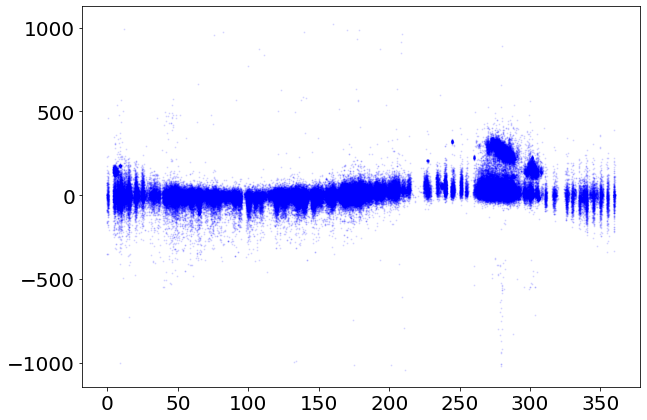

In [35]:
star_hdus = fits.open('miniDR17.fits')
starfit5 = star_hdus[1].data
star_hdus.close()

badbits = 2**23        # aspcapstar flag - Chemistry
suspectbits = 2**16    # star flag - Stellar parameters

# Make a Boolena Mask to remove bad data - AND ANY OTHER NEEDE CUTS (e.g., −2 < GLAT < 2 )
ct1 = (np.bitwise_and(starfit4['aspcapflag'], badbits) == 0) &\
     (np.bitwise_and(starfit4['starflag'], suspectbits) == 0) &\
     (starfit5['GLAT'] < -10) & (starfit5['GLAT'] < 10)

cut1 = np.where(ct1)[0]

fig1 = plt.figure(figsize=(10,7))
ax1 = fig1.add_subplot(111)
ax1.xaxis.set_tick_params(labelsize=20)
ax1.yaxis.set_tick_params(labelsize=20)
ax1.scatter(starfit5['GLON'][cut1],starfit5['VHELIO_AVG'][cut1],s=1,c='b',alpha=0.1)
plt.show()

In [45]:
## LINEAR FIT (2 parameter)
slope, intercept = mcFit2(linear, starfit5['GLON'][cut1], starfit5['VHELIO_AVG'][cut1], p0=[0,-30])

print(f'LINEAR: {slope:.3f}, {intercept:.3f}')

## POLY3 FIT (4 parameter)
PolyA, PolyB, PolyC, PolyD = mcFit4(poly3, starfit5['GLON'][cut1], starfit5['VHELIO_AVG'][cut1],p0=[0,0,-3,60])

print(f'POLY3: {PolyA:.3f}, {PolyB:.3f}, {PolyC:.3f}, {PolyD:.3f}')

## COS FIT (4 parameter)
cfA, cfB, cfC, cfD = mcFit4(cosfit, starfit5['GLON'][cut1], starfit5['VHELIO_AVG'][cut1],p0=[60,0,5,20])

print(f'COSFIT: {cfA:.3f}, {cfB:.3f}, {cfC:.3f}, {cfD:.3f}')



LINEAR: 0.352, -34.202
POLY3: -0.000, 0.019, -2.456, 58.002
COSFIT: 58.401, -0.018, 4.987, 23.945


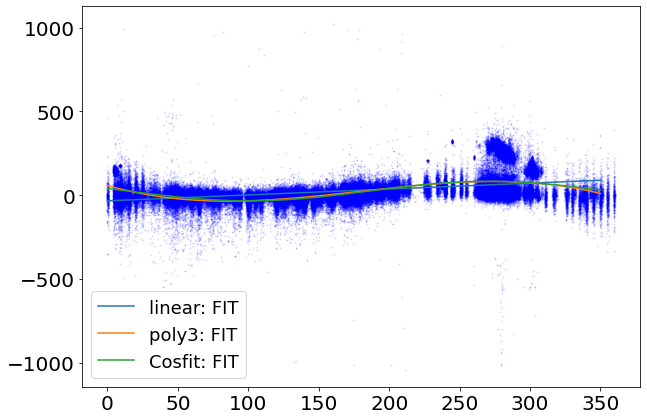

In [47]:
# PLOT TO VERIFY FITS FILE READ IN & BAD MASK DATA
fig1 = plt.figure(figsize=(10,7))
ax1 = fig1.add_subplot(111)
ax1.xaxis.set_tick_params(labelsize=20)
ax1.yaxis.set_tick_params(labelsize=20)

# PLOT DATA AND ERROR BARS
ax1.scatter(starfit5['GLON'][cut1],starfit5['VHELIO_AVG'][cut1],s=1,c='b',alpha=0.1)
ax1.errorbar((starfit5['VHELIO_AVG'][cut1]),(starfit5['VERR'][cut1]), ecolor='grey',fmt='none', capsize=5, zorder=0)


# PLOT DATA FITS FROM ABOVE
x_plot = np.linspace(0,350,1000) # X-PLOTING FOR FITS
#linear fit
ax1.plot(x_plot,linear(x_plot, slope, intercept), label='linear: FIT')
#poly3 fit
ax1.plot(x_plot,poly3(x_plot, PolyA, PolyB, PolyC, PolyD ), label='poly3: FIT')
#cosfit
ax1.plot(x_plot,cosfit(x_plot, cfA, cfB, cfC, cfD), label='Cosfit: FIT')

plt.legend(loc='best', fontsize=18)
plt.show()
#the line that fits best is the poly3
#there arent any outliers  

## DATA FIT 6

Fit a linear, an exponential, and a polynomial (poly3) functions and to the following selections of the data:<br>
6. __Fit NVISITS vs.  VSCATTER (VERR)__ For NVISITS $>= 1$<br>
<br>
For this fit of the above selection:

1. What are the best-fit values of the parameters? 
2. Which fucntion fits the data best?
3. Is there a second population? (Can you fit outliers with a reasonable linear trend)

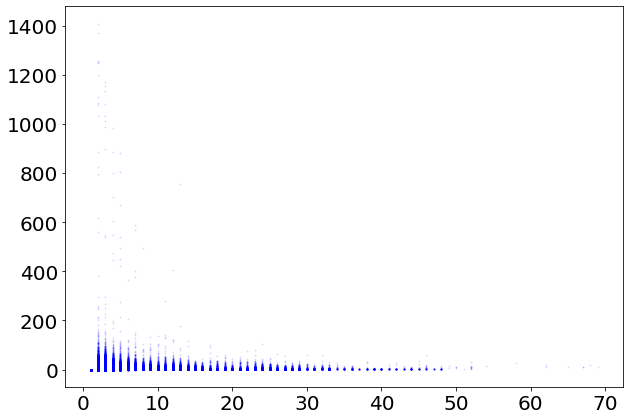

In [7]:
star_hdus = fits.open('miniDR17.fits')
starfit6 = star_hdus[1].data
star_hdus.close()

badbits = 2**23        # aspcapstar flag - Chemistry
suspectbits = 2**16    # star flag - Stellar parameters

# Make a Boolena Mask to remove bad data - AND ANY OTHER NEEDE CUTS (e.g., −2 < GLAT < 2 )
ct1 = (np.bitwise_and(starfit6['aspcapflag'], badbits) == 0) &\
     (np.bitwise_and(starfit6['starflag'], suspectbits) == 0) &\
     (starfit6['NVISTIS'] >= 1)

cut1 = np.where(ct1)[0]

fig1 = plt.figure(figsize=(10,7))
ax1 = fig1.add_subplot(111)
ax1.xaxis.set_tick_params(labelsize=20)
ax1.yaxis.set_tick_params(labelsize=20)
ax1.scatter(starfit6['NVISTIS'][cut1],starfit6['VSCATTER'][cut1],s=1,c='b',alpha=0.1)
plt.show()

In [71]:
## LINEAR FIT (2 parameter)
slope, intercept = mcFit2(linear, starfit6['NVISTIS'][cut1], starfit6['VSCATTER'][cut1], p0=[0,150])

print(f'LINEAR: {slope:.3f}, {intercept:.3f}')


## POLY3 FIT (4 parameter)
PolyA, PolyB, PolyC, PolyD = mcFit4(poly3, starfit6['NVISTIS'][cut1], starfit6['VSCATTER'][cut1],p0=[0,-.2,.4,-.1])

print(f'POLY3: {PolyA:.3f}, {PolyB:.3f}, {PolyC:.3f}, {PolyD:.3f}')

## Exponential (4 parameter)
expA, expB, expC, expD = mcFit4(exponential, starfit6['NVISTIS'][cut1], starfit6['VSCATTER'][cut1],p0=[0,0,0,0])
print(f'POLY3: {expA:.3f}, {expB:.3f}, {expC:.3f}, {expD:.3f}')



LINEAR: 0.068, 0.923
POLY3: 0.001, -0.037, 0.524, 0.012


RuntimeError: Optimal parameters not found: Number of calls to function has reached maxfev = 1000.

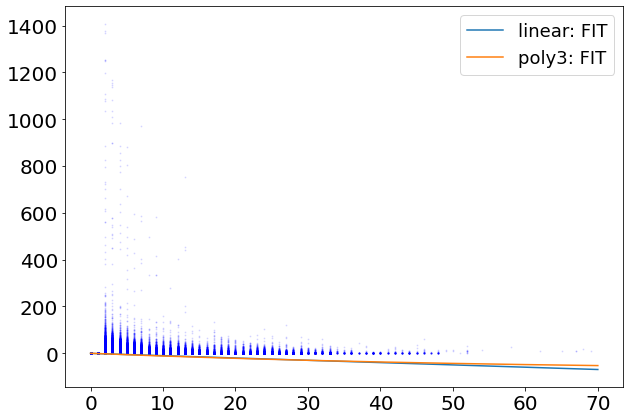

In [51]:
# PLOT TO VERIFY FITS FILE READ IN & BAD MASK DATA
fig1 = plt.figure(figsize=(10,7))
ax1 = fig1.add_subplot(111)
ax1.xaxis.set_tick_params(labelsize=20)
ax1.yaxis.set_tick_params(labelsize=20)

# PLOT DATA AND ERROR BARS
ax1.scatter(starfit6['NVISTIS'][cut1],starfit6['VSCATTER'][cut1],s=1,c='b',alpha=0.1)

# PLOT DATA FITS FROM ABOVE
x_plot = np.linspace(0,70,1000) # X-PLOTING FOR FITS
#linear fit
ax1.plot(x_plot,linear(x_plot, slope, intercept), label='linear: FIT')
#poly3 fit
ax1.plot(x_plot,poly3(x_plot, PolyA, PolyB, PolyC, PolyD ), label='poly3: FIT')
#exponential fit
#ax1.plot(x_plot,exponential(x_plot, expA, expB, expC, expD ), label='poly3: FIT')
plt.legend(loc='best', fontsize=18)
plt.show()
#the line that fits best is the poly3
#there arent any outliers  

## DATA FIT 7

Fit  a linear and a polynomial (poly2 AND poly3) functions and to the following selections of the data:<br>
7. __Fit RA  vs.  GAIA_PMRA (GAIA_PMRA_ERROR)__<br>
<br>
For this fit of the above selection:

1. What are the best-fit values of the parameters? 
2. Which fucntion fits the data best?
3. Is there a second population? (Can you fit outliers with a reasonable linear trend)

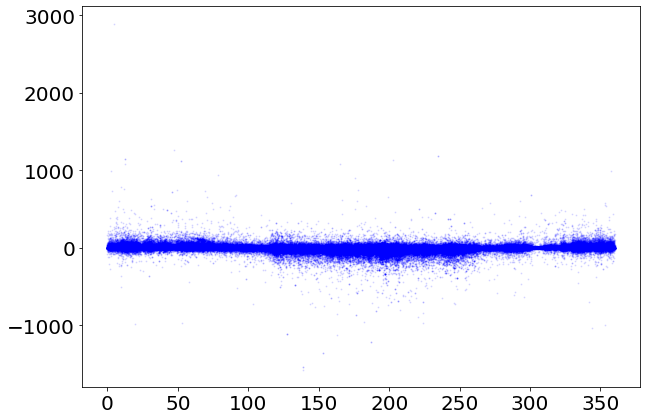

In [72]:
star_hdus = fits.open('miniDR17.fits')
starfit7 = star_hdus[1].data
star_hdus.close()

badbits = 2**23        # aspcapstar flag - Chemistry
suspectbits = 2**16    # star flag - Stellar parameters

starfit7 = starfit7[~np.isnan(starfit7['RA'])]
starfit7 = starfit7[~np.isnan(starfit7['GAIA_PMRA'])]
# Make a Boolena Mask to remove bad data - AND ANY OTHER NEEDE CUTS (e.g., −2 < GLAT < 2 )
ct1 = (np.bitwise_and(starfit7['aspcapflag'], badbits) == 0) &\
     (np.bitwise_and(starfit7['starflag'], suspectbits) == 0) 

cut1 = np.where(ct1)[0]

fig1 = plt.figure(figsize=(10,7))
ax1 = fig1.add_subplot(111)
ax1.xaxis.set_tick_params(labelsize=20)
ax1.yaxis.set_tick_params(labelsize=20)
ax1.scatter(starfit7['RA'][cut1],starfit7['GAIA_PMRA'][cut1],s=1,c='b',alpha=0.1)
plt.show()

In [73]:
## LINEAR FIT (2 parameter)
slope, intercept = mcFit2(linear, starfit7['RA'][cut1], starfit7['GAIA_PMRA'][cut1], p0=[0,150])

print(f'LINEAR: {slope:.3f}, {intercept:.3f}')

## POLY2 FIT (3 parameter)
polyA2, polyB2, polyC2,  = mcFit3(poly2, starfit7['RA'][cut1], starfit7['GAIA_PMRA'][cut1],p0=[600,1,1])
print(f'POLY2: {polyA2:.3f}, {polyB2:.3f}, {polyC2:.3f}')

## POLY3 FIT (4 parameter)
PolyA, PolyB, PolyC, PolyD = mcFit4(poly3, starfit7['RA'][cut1], starfit7['GAIA_PMRA'][cut1],p0=[10,10,10,10])

print(f'POLY3: {PolyA:.3f}, {PolyB:.3f}, {PolyC:.3f}, {PolyD:.3f}')


LINEAR: -0.019, 0.602
POLY2: 0.001, -0.275, 16.746
POLY3: 0.000, -0.000, -0.169, 13.114


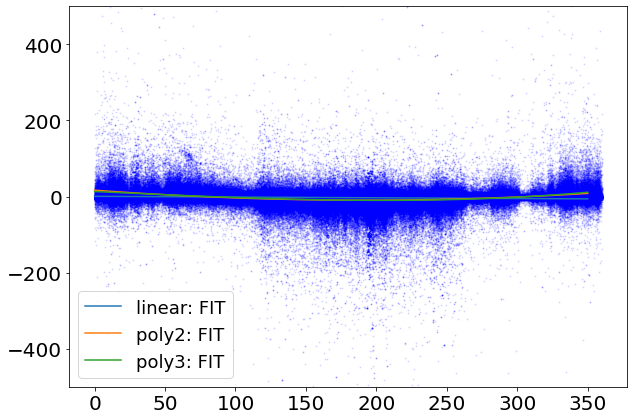

In [81]:
# PLOT TO VERIFY FITS FILE READ IN & BAD MASK DATA
fig1 = plt.figure(figsize=(10,7))
ax1 = fig1.add_subplot(111)
ax1.xaxis.set_tick_params(labelsize=20)
ax1.yaxis.set_tick_params(labelsize=20)

# PLOT DATA AND ERROR BARS
ax1.scatter(starfit7['RA'][cut1],starfit7['GAIA_PMRA'][cut1],s=1,c='b',alpha=0.1)

# PLOT DATA FITS FROM ABOVE
x_plot = np.linspace(0,350,1000) # X-PLOTING FOR FITS
#linear fit
ax1.plot(x_plot,linear(x_plot, slope, intercept), label='linear: FIT')
#poly2 fit
ax1.plot(x_plot,poly2(x_plot, polyA2, polyB2, polyC2 ), label='poly2: FIT')
#poly3 fit
ax1.plot(x_plot,poly3(x_plot, PolyA, PolyB, PolyC, PolyD ), label='poly3: FIT')
plt.ylim([-500,500])
plt.legend(loc='best', fontsize=18)
plt.show()
#the line that fits best is the poly2
#there arent any outliers populations 

## DATA FIT 8

Fit  a linear and a polynomial (poly2 AND poly3) functions and to the following selections of the data:<br>
8. select stars with only TEFF < 6000 and LOGG < 3<br>
__Fit TEFF (TEFF_ERR)  vs.  LOGG (LOGG_ERR)__<br>
<br>
For this fit of the above selection:

1. What are the best-fit values of the parameters? 
2. Which fucntion fits the data best?
3. Is there a second population? (Can you fit outliers with a reasonable linear trend)

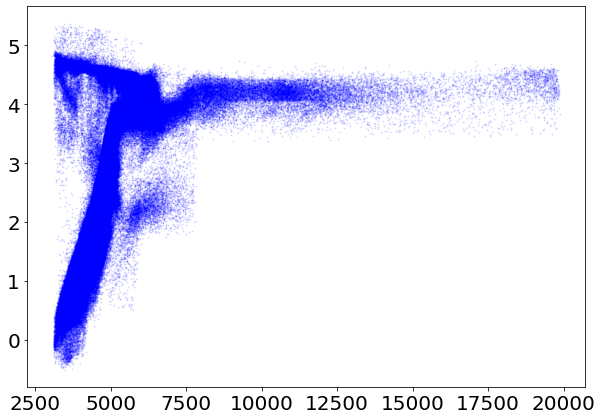

In [83]:
star_hdus = fits.open('miniDR17.fits')
starfit8 = star_hdus[1].data
star_hdus.close()

badbits = 2**23        # aspcapstar flag - Chemistry
suspectbits = 2**16    # star flag - Stellar parameters

starfit8 = starfit8[~np.isnan(starfit8['TEFF'])]
starfit8 = starfit8[~np.isnan(starfit8['LOGG'])]
# Make a Boolena Mask to remove bad data - AND ANY OTHER NEEDE CUTS (e.g., −2 < GLAT < 2 )
ct1 = (np.bitwise_and(starfit8['aspcapflag'], badbits) == 0) &\
     (np.bitwise_and(starfit8['starflag'], suspectbits) == 0) 

cut1 = np.where(ct1)[0]

fig1 = plt.figure(figsize=(10,7))
ax1 = fig1.add_subplot(111)
ax1.xaxis.set_tick_params(labelsize=20)
ax1.yaxis.set_tick_params(labelsize=20)
ax1.scatter(starfit8['TEFF'][cut1],starfit8['LOGG'][cut1],s=1,c='b',alpha=0.1)
plt.show()

In [30]:
## LINEAR FIT (2 parameter)
slope, intercept = mcFit2(linear, starfit8['TEFF'][cut1], starfit8['LOGG'][cut1], p0=[0,1])

print(f'LINEAR: {slope:.3f}, {intercept:.3f}')

## POLY2 FIT (3 parameter)
polyA2, polyB2, polyC2,  = mcFit3(poly2, starfit8['TEFF'][cut1], starfit8['LOGG'][cut1],p0=[0,0,0])
print(f'POLY2: {polyA2:.3f}, {polyB2:.3f}, {polyC2:.3f}')

## POLY3 FIT (4 parameter)
PolyA, PolyB, PolyC, PolyD = mcFit4(poly3, starfit8['TEFF'][cut1], starfit8['LOGG'][cut1],p0=[0,0,0,0])

print(f'POLY3: {PolyA:.3f}, {PolyB:.3f}, {PolyC:.3f}, {PolyD:.3f}')


LINEAR: 0.000, 1.394
POLY2: -0.000, 0.001, -1.378
POLY3: 0.000, -0.000, 0.002, -4.208


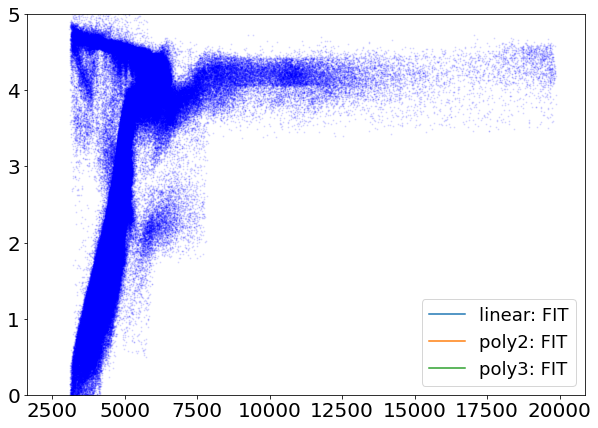

In [86]:
# PLOT TO VERIFY FITS FILE READ IN & BAD MASK DATA
fig1 = plt.figure(figsize=(10,7))
ax1 = fig1.add_subplot(111)
ax1.xaxis.set_tick_params(labelsize=20)
ax1.yaxis.set_tick_params(labelsize=20)

# PLOT DATA AND ERROR BARS
ax1.scatter(starfit8['TEFF'][cut1],starfit8['LOGG'][cut1],s=1,c='b',alpha=0.1)

# PLOT DATA FITS FROM ABOVE
x_plot = np.linspace(2500,20000,1000) # X-PLOTING FOR FITS
#linear fit
ax1.plot(x_plot,linear(x_plot, slope, intercept), label='linear: FIT')
#poly2 fit
ax1.plot(x_plot,poly2(x_plot, polyA2, polyB2, polyC2 ), label='poly2: FIT')
#poly3 fit
ax1.plot(x_plot,poly3(x_plot, PolyA, PolyB, PolyC, PolyD ), label='poly3: FIT')
plt.legend(loc='best', fontsize=18)
plt.ylim([0,5])
plt.show()
#the line that fits best is the poly2
#there arent any outliers populations 

## DATA FIT 9

Fit  a linear and a polynomial (poly2 AND poly3) functions and to the following selections of the data:<br>
9. __Fit GAIA_PARALLAX (GAIA_PARALLAX_ERROR) vs.  GAIA_PMRA (GAIA_PMRA_ERROR)__<br>
<br>
For this fit of the above selection:

1. What are the best-fit values of the parameters? 
2. Which fucntion fits the data best?
3. Is there a second population? (Can you fit outliers with a reasonable linear trend)

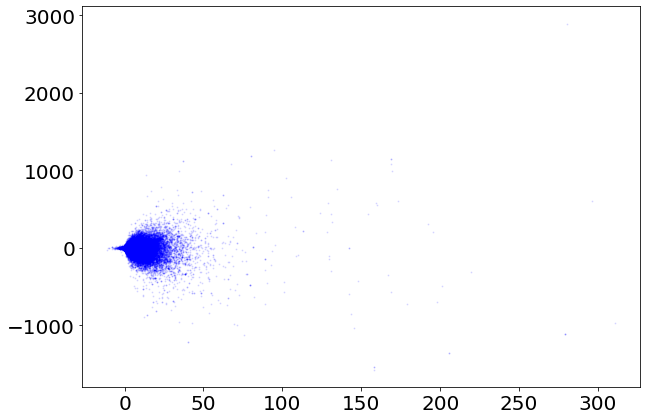

In [40]:
star_hdus = fits.open('miniDR17.fits')
starfit9 = star_hdus[1].data
star_hdus.close()

badbits = 2**23        # aspcapstar flag - Chemistry
suspectbits = 2**16    # star flag - Stellar parameters

starfit9 = starfit9[~np.isnan(starfit9['GAIA_PARALLAX'])]
# Make a Boolena Mask to remove bad data - AND ANY OTHER NEEDE CUTS (e.g., −2 < GLAT < 2 )
ct1 = (np.bitwise_and(starfit9['aspcapflag'], badbits) == 0) &\
     (np.bitwise_and(starfit9['starflag'], suspectbits) == 0) 

cut1 = np.where(ct1)[0]

fig1 = plt.figure(figsize=(10,7))
ax1 = fig1.add_subplot(111)
ax1.xaxis.set_tick_params(labelsize=20)
ax1.yaxis.set_tick_params(labelsize=20)
ax1.scatter(starfit9['GAIA_PARALLAX'][cut1],starfit9['GAIA_PMRA'][cut1],s=1,c='b',alpha=0.1)
plt.show()

In [41]:
## LINEAR FIT (2 parameter)
slope, intercept = mcFit2(linear, starfit9['GAIA_PARALLAX'][cut1], starfit9['GAIA_PMRA'][cut1], p0=[0,1])

print(f'LINEAR: {slope:.3f}, {intercept:.3f}')

## POLY2 FIT (3 parameter)
polyA2, polyB2, polyC2,  = mcFit3(poly2, starfit9['GAIA_PARALLAX'][cut1], starfit9['GAIA_PMRA'][cut1],p0=[0,0,0])
print(f'POLY2: {polyA2:.3f}, {polyB2:.3f}, {polyC2:.3f}')

## POLY3 FIT (4 parameter)
PolyA, PolyB, PolyC, PolyD = mcFit4(poly3, starfit9['GAIA_PARALLAX'][cut1], starfit9['GAIA_PMRA'][cut1],p0=[0,0,0,0])

print(f'POLY3: {PolyA:.3f}, {PolyB:.3f}, {PolyC:.3f}, {PolyD:.3f}')


LINEAR: -0.985, -0.972
POLY2: 0.002, -1.100, -0.783
POLY3: -0.000, 0.009, -1.240, -0.602


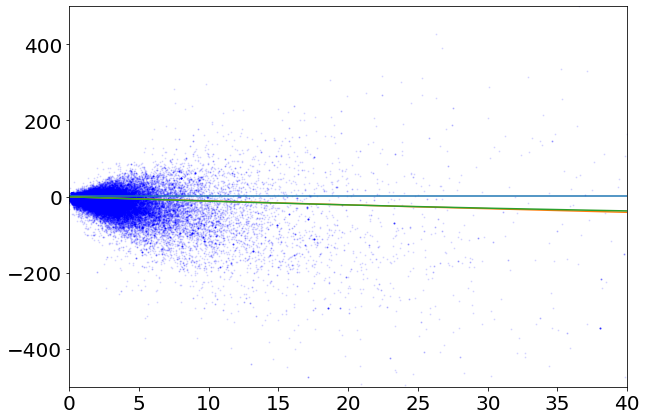

In [62]:
# PLOT TO VERIFY FITS FILE READ IN & BAD MASK DATA
fig1 = plt.figure(figsize=(10,7))
ax1 = fig1.add_subplot(111)
ax1.xaxis.set_tick_params(labelsize=20)
ax1.yaxis.set_tick_params(labelsize=20)

# PLOT DATA AND ERROR BARS
ax1.scatter(starfit9['GAIA_PARALLAX'][cut1],starfit9['GAIA_PMRA'][cut1],s=1,c='b',alpha=0.1)

# PLOT DATA FITS FROM ABOVE
x_plot = np.linspace(0,300,1000) # X-PLOTING FOR FITS
#linear fit
ax1.plot(x_plot,linear(x_plot, slope, intercept), label='linear: FIT')
#poly2 fit
ax1.plot(x_plot,poly2(x_plot, polyA2, polyB2, polyC2 ), label='poly2: FIT')
#poly3 fit
ax1.plot(x_plot,poly3(x_plot, PolyA, PolyB, PolyC, PolyD ), label='poly3: FIT')
plt.xlim([0, 40])
plt.ylim([-500, 500])
plt.show()
#the line that fits best is any of them 
#there arent any outliers populations 